# Anomaly Detection & Time Series

1. What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.
    - Anomaly Detection is the process of identifying data points or patterns that differ significantly from normal behavior.

      **Types of Anomalies**
      * **Point Anomaly:** A single data point that is different from the rest. Example: A ₹2,00,000 credit card transaction when most transactions are below ₹2,000.
      * **Contextual Anomaly:** A data point that is anomalous only in a specific context (time, location, etc.). Example: High website traffic at midnight when traffic is usually low.
      * **Collective Anomaly:** A group of data points that together form an anomaly. Example: Multiple failed login attempts in a short time indicating a security attack.

2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.
   - **Isolation Forest:** Works by randomly splitting data into smaller parts. Anomalies are identified because they get isolated with fewer splits. Best suited for: Large and high-dimensional datasets such as fraud detection or log analysis.

      **DBSCAN:** Groups data points based on density. Points that do not belong to any dense cluster are considered anomalies. Best suited for: Spatial or geographical data and datasets with irregular cluster shapes.

      **Local Outlier Factor (LOF):** Compares the local density of a point with that of its neighbors to find points that are significantly less dense. Best suited for: Detecting local outliers in datasets with varying densities.

3. What are the key components of a Time Series? Explain each with one
example.
    - A time series is a sequence of data points recorded over time. Its main components are:
      
      **Trend:** The long-term movement or direction in the data. Example: A steady increase in monthly sales over several years.

      **Seasonality:** Regular patterns that repeat at fixed intervals (daily, monthly, yearly). Example: Higher ice cream sales during summer every year.

      **Cyclic:** Long-term fluctuations that do not have a fixed period, often related to economic conditions. Example: Business growth and decline during economic booms and recessions.

      **Irregular (Noise)** Random, unpredictable variations in the data. Example: A sudden drop in sales due to a natural disaster.

4. Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?
    * A time series is called stationary when its mean, variance, and overall behavior do not change with time.

      **Ways to Check Stationarity**
      1. Graphical Method: Observe the time series plot to see if it shows a constant level and spread.
      2. ADF (Augmented Dickey-Fuller) Test: A small p-value (less than 0.05) indicates stationarity.
      3. KPSS Test: A small p-value indicates non-stationarity.
      
      **Converting a Non-Stationary Series into a Stationary One**
      1. Differencing the Data: Removes trend by subtracting consecutive values.
      2. Applying Transformations: Log or square-root transformations help stabilize variance.
      3. Eliminating Seasonality: Use seasonal differencing or time series decomposition.

5. Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.
   - **AR (Autoregressive):** Predicts current values using past observations of the same series. Used when: Past values strongly influence future values.

      **MA (Moving Average):** Models the current value using past prediction errors. Used when: Random disturbances affect the series.

      **ARIMA:** A combination of AR and MA with differencing to handle non-stationary data. Used when: Data has no seasonality but shows trend.

      **SARIMA:** An extension of ARIMA that includes seasonal terms. Used when: Data exhibits repeating seasonal patterns.

      **SARIMAX:** Further extends SARIMA by adding external (exogenous) variables. Used when: Time series depends on other influencing factors.




/tmp/ipython-input-3969592610.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Month": pd.date_range(start="1949-01-01", periods=144, freq="M"),


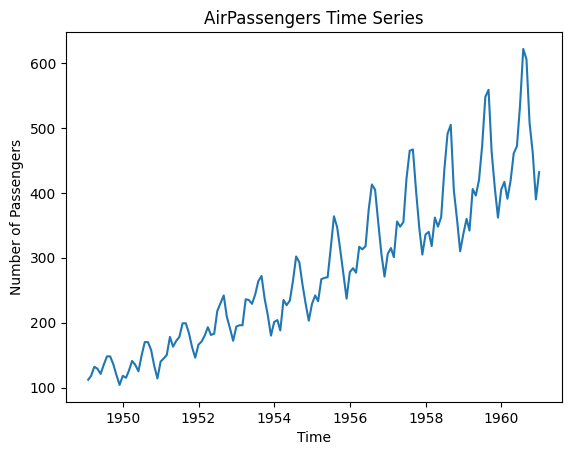

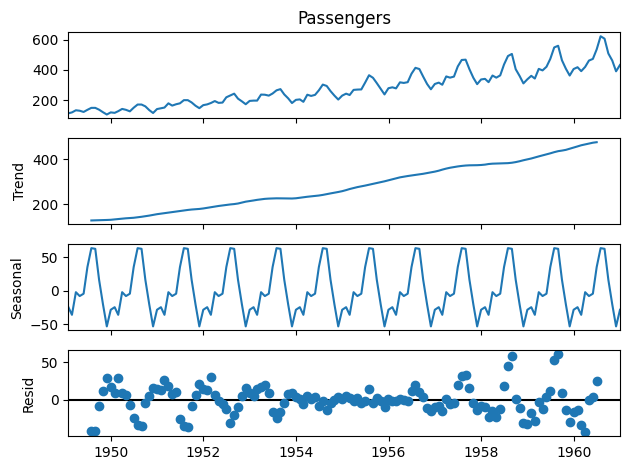

In [2]:
# Q-6. Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = {
    "Month": pd.date_range(start="1949-01-01", periods=144, freq="M"),
    "Passengers": [
        112,118,132,129,121,135,148,148,136,119,104,118,
        115,126,141,135,125,149,170,170,158,133,114,140,
        145,150,178,163,172,178,199,199,184,162,146,166,
        171,180,193,181,183,218,230,242,209,191,172,194,
        196,196,236,235,229,243,264,272,237,211,180,201,
        204,188,235,227,234,264,302,293,259,229,203,229,
        242,233,267,269,270,315,364,347,312,274,237,278,
        284,277,317,313,318,374,413,405,355,306,271,306,
        315,301,356,348,355,422,465,467,404,347,305,336,
        340,318,362,348,363,435,491,505,404,359,310,337,
        360,342,406,396,420,472,548,559,463,407,362,405,
        417,391,419,461,472,535,622,606,508,461,390,432
    ]
}

df = pd.DataFrame(data)
df.set_index("Month", inplace=True)

plt.figure()
plt.plot(df["Passengers"])
plt.title("AirPassengers Time Series")
plt.xlabel("Time")
plt.ylabel("Number of Passengers")
plt.show()

decomposition = seasonal_decompose(df["Passengers"], model="additive", period=12)

decomposition.plot()
plt.show()


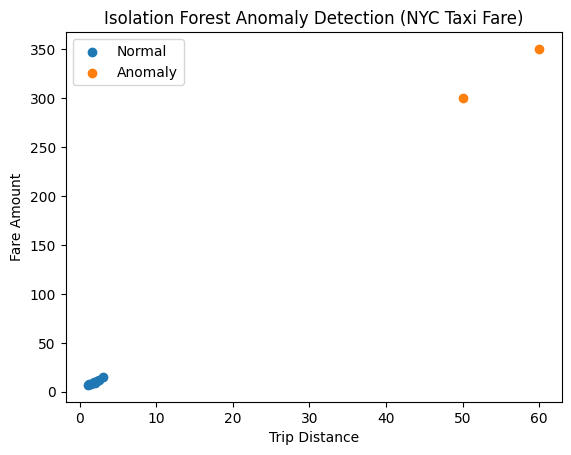

In [4]:
# Q-7. Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

data = {
    "trip_distance": [1.2, 2.5, 3.0, 1.8, 2.2, 50.0, 1.1, 2.0, 60.0, 1.5],
    "fare_amount":   [8, 12, 15, 10, 11, 300, 7, 9, 350, 8]
}

df = pd.DataFrame(data)

iso_forest = IsolationForest(contamination=0.2, random_state=42)
df["anomaly"] = iso_forest.fit_predict(df[["trip_distance", "fare_amount"]])

normal = df[df["anomaly"] == 1]
anomalies = df[df["anomaly"] == -1]

plt.figure()
plt.scatter(normal["trip_distance"], normal["fare_amount"], label="Normal")
plt.scatter(anomalies["trip_distance"], anomalies["fare_amount"], label="Anomaly")
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Isolation Forest Anomaly Detection (NYC Taxi Fare)")
plt.legend()
plt.show()

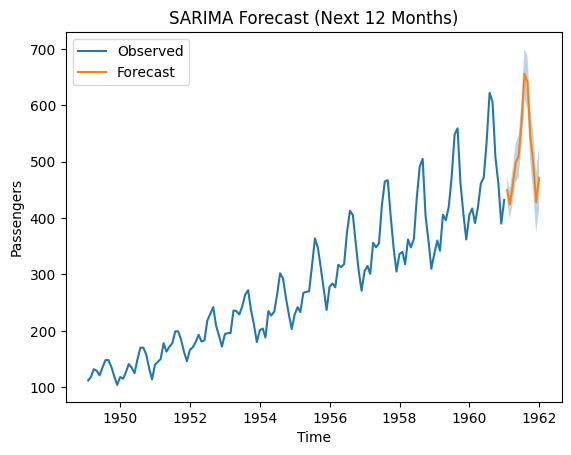

In [7]:
# Q-8. Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

data = {
    "Month": pd.date_range(start="1949-01-01", periods=144, freq="ME"),
    "Passengers": [
        112,118,132,129,121,135,148,148,136,119,104,118,
        115,126,141,135,125,149,170,170,158,133,114,140,
        145,150,178,163,172,178,199,199,184,162,146,166,
        171,180,193,181,183,218,230,242,209,191,172,194,
        196,196,236,235,229,243,264,272,237,211,180,201,
        204,188,235,227,234,264,302,293,259,229,203,229,
        242,233,267,269,270,315,364,347,312,274,237,278,
        284,277,317,313,318,374,413,405,355,306,271,306,
        315,301,356,348,355,422,465,467,404,347,305,336,
        340,318,362,348,363,435,491,505,404,359,310,337,
        360,342,406,396,420,472,548,559,463,407,362,405,
        417,391,419,461,472,535,622,606,508,461,390,432
    ]
}

df = pd.DataFrame(data)
df.set_index("Month", inplace=True)
df = df.asfreq("ME")

model = SARIMAX(
    df["Passengers"],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12)
)
results = model.fit(disp=False)

forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure()
plt.plot(df.index, df["Passengers"], label="Observed")
plt.plot(forecast_mean.index, forecast_mean, label="Forecast")
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    alpha=0.3
)
plt.title("SARIMA Forecast (Next 12 Months)")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.show()

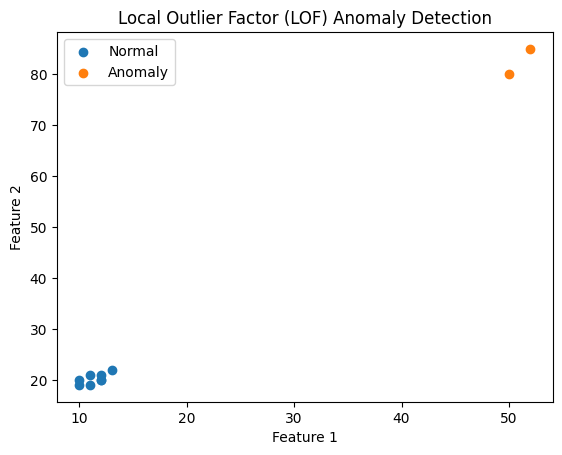

In [8]:
# Q-9. Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

data = {
    "feature_1": [10, 12, 11, 13, 12, 11, 50, 52, 10, 12],
    "feature_2": [20, 21, 19, 22, 20, 21, 80, 85, 19, 20]
}

df = pd.DataFrame(data)

lof = LocalOutlierFactor(n_neighbors=3, contamination=0.2)
df["anomaly"] = lof.fit_predict(df[["feature_1", "feature_2"]])

normal = df[df["anomaly"] == 1]
anomalies = df[df["anomaly"] == -1]

plt.figure()
plt.scatter(normal["feature_1"], normal["feature_2"], label="Normal")
plt.scatter(anomalies["feature_1"], anomalies["feature_2"], label="Anomaly")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Local Outlier Factor (LOF) Anomaly Detection")
plt.legend()
plt.show()

10. You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.
      
      Explain your real-time data science workflow:

          ● How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?
          ● Which time series model would you use for short-term forecasting (ARIMA / SARIMA / SARIMAX)?
          ● How would you validate and monitor the performance over time?
          ● How would this solution help business decisions or operations?

    - **Anomaly Detection in Streaming Data**

        Use Isolation Forest to detect unusual spikes or drops in real-time energy usage since it is fast and scalable. LOF can detect local anomalies, such as abnormal usage in a specific region. DBSCAN may be used for offline analysis but is less suitable for streaming data.

      **Short-Term Energy Demand Forecasting**

      Use SARIMAX to forecast 15-minute energy consumption, as it handles seasonality and allows incorporation of exogenous variables like temperature or humidity. This improves forecast accuracy during peak and off-peak periods.

      **Validation and Continuous Monitoring**

      Monitor model performance using MAE, RMSE, and MAPE on rolling windows. Track anomalies against historical events to validate detection. Periodically retrain models to adapt to changes in energy usage patterns.

      **Business and Operational Impact**

      Real-time detection prevents grid overloads and outages. Accurate forecasts optimize energy generation and cost. Early anomaly alerts help with preventive maintenance and faster operational decisions.